<a href="https://colab.research.google.com/github/ramrajv/Convolutional-Neural-Networks/blob/main/Building%20CNNs%20with%20Python%20and%20Keras/1.%2BCifar_10_with_dropout_without_BN_mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# import libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# batch, classes, epochs
batch_size = 1000
num_classes = 10
epochs = 50

In [39]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


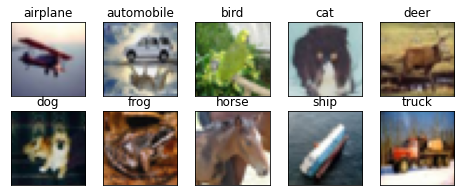

In [40]:
# plotting some random 10 images
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [41]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [42]:
# model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(625))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [43]:
# summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_34 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_35 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 15, 15, 32)        0         
                                                      

In [44]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# convert to float, normalise the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [45]:
# train 
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
50/50 [==============================] - 10s 151ms/step - loss: 1.9136 - accuracy: 0.2956 - val_loss: 1.5863 - val_accuracy: 0.4289
Epoch 2/50
50/50 [==============================] - 7s 142ms/step - loss: 1.5307 - accuracy: 0.4380 - val_loss: 1.3739 - val_accuracy: 0.5004
Epoch 3/50
50/50 [==============================] - 7s 142ms/step - loss: 1.3616 - accuracy: 0.5112 - val_loss: 1.2405 - val_accuracy: 0.5502
Epoch 4/50
50/50 [==============================] - 7s 137ms/step - loss: 1.2512 - accuracy: 0.5536 - val_loss: 1.1393 - val_accuracy: 0.5982
Epoch 5/50
50/50 [==============================] - 7s 138ms/step - loss: 1.1633 - accuracy: 0.5874 - val_loss: 1.0675 - val_accuracy: 0.6271
Epoch 6/50
50/50 [==============================] - 7s 141ms/step - loss: 1.0906 - accuracy: 0.6145 - val_loss: 1.0202 - val_accuracy: 0.6432
Epoch 7/50
50/50 [==============================] - 7s 137ms/step - loss: 1.0301 - accuracy: 0.6351 - val_loss: 0.9475 - val_accuracy: 0.6711
Epoch

Result: After 50 epochs, the difference between training and validation accuracy is low but the training is slow as compared to the model with batch normalization.

In [46]:
y_pred = model.predict(x = x_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_true = y_test, y_pred = y_pred)

ValueError: ignored

In [49]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [50]:
y_pred

array([[1.14585800e-05, 1.15093526e-05, 9.78137814e-06, ...,
        1.80841471e-05, 1.04314199e-06, 1.62740560e-06],
       [9.30515125e-06, 1.60638974e-05, 5.39558022e-14, ...,
        2.50006503e-20, 9.99967933e-01, 6.69985911e-06],
       [1.95815340e-02, 6.39664708e-03, 3.69954307e-08, ...,
        6.69429383e-08, 9.73306239e-01, 7.14868889e-04],
       ...,
       [1.62798455e-10, 2.63040090e-10, 2.23758616e-05, ...,
        2.69909925e-03, 7.15019226e-08, 1.15768117e-07],
       [8.15301910e-02, 1.15709446e-01, 2.73662293e-03, ...,
        7.69208491e-05, 1.09413094e-07, 7.06868450e-05],
       [4.92096200e-15, 1.00877660e-14, 3.83909094e-12, ...,
        9.99998212e-01, 5.27171411e-15, 1.13873754e-13]], dtype=float32)

In [52]:
y_pred = np.round(y_pred,0)

In [53]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [54]:
accuracy_score(y_true = y_test, y_pred = y_pred)

0.7718

In [57]:
np.shape(x_train)

(50000, 32, 32, 3)

In [61]:
x_train[0][:][:][0]

array([[0.23137255, 0.24313726, 0.24705882],
       [0.16862746, 0.18039216, 0.1764706 ],
       [0.19607843, 0.1882353 , 0.16862746],
       [0.26666668, 0.21176471, 0.16470589],
       [0.38431373, 0.28627452, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509807, 0.41960785, 0.29411766],
       [0.5686275 , 0.43137255, 0.3137255 ],
       [0.58431375, 0.45882353, 0.34901962],
       [0.58431375, 0.47058824, 0.3647059 ],
       [0.5137255 , 0.40392157, 0.3019608 ],
       [0.49019608, 0.3882353 , 0.29803923],
       [0.5568628 , 0.4509804 , 0.35686275],
       [0.5647059 , 0.4392157 , 0.3372549 ],
       [0.5372549 , 0.4117647 , 0.30980393],
       [0.5058824 , 0.38039216, 0.2784314 ],
       [0.5372549 , 0.41568628, 0.30980393],
       [0.5254902 , 0.41568628, 0.29803923],
       [0.4862745 , 0.38039216, 0.2509804 ],
       [0.54509807, 0.44313726, 0.30588236],
       [0.54509807, 0.4392157 , 0.29411766],
       [0.52156866, 0.4117647 , 0.27058825],
       [0.